In [1]:
import numpy as np
import pandas as pd
from shap import TreeExplainer
from shap import summary_plot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
#reading dataframes

all_data=pd.read_csv("train.csv") 
test_data=pd.read_csv("test.csv")

In [3]:
#all_data.info()

In [4]:
#test_data.info()

In [5]:
all_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
# X and target y for training data
X_train= all_data.iloc[:,[4,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_train= all_data.iloc[:, -1]

In [7]:
# X and target y for test data
X_test= test_data.iloc[:,[4,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_test= test_data.iloc[:, -1]

In [8]:
#Convert y target to 1 for satisfied and 0 for neutral or dissatisfied

y_train = y_train.replace('satisfied',1)
y_train = y_train.replace('neutral or dissatisfied',0)

y_test = y_test.replace('satisfied',1)
y_test = y_test.replace('neutral or dissatisfied',0)

In [9]:
#y_train.head()
#y_test.head()
#y_test.value_counts()
#y_train.value_counts()
#X_train.dtypes

In [10]:
#Train and validation split

X= X_train
y= y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)

In [11]:
#X_train.info()
#X_val.info()
#y_train
#y_val

In [12]:

#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [13]:
#Baseline Decisison Tree  with  all variables  on training data
#closer to zero the better

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
#y_prob_pred_train = dtreepredict_proba(X_train)[:,1]




DecisionTreeClassifier()

In [14]:
#RMSE of Decision Tree with Validation Set

rmse(dtree.predict(X_val), y_val)

0.2727542482499682

In [15]:
#RMSE of Decision Tree with Test Set

rmse(dtree.predict(X_test), y_test)

0.2728613962180112

In [16]:
#Decison Tree Classification report on Validation Set 

print(classification_report(y_val, dtree.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11713
           1       0.91      0.92      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [17]:
#Decision Tree Classification report on Test Set

print(classification_report(y_test, dtree.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     14573
           1       0.91      0.92      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



In [18]:
#feature_names=list(X.columns)

#from sklearn.tree import export_text
#r = export_text(dtree, feature_names=feature_names)
#print(r)

In [19]:
#Logistic Regression model on validation data
#closer to zero the better

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [20]:
#RMSE of Logistric Regression with Validation Set

rmse(logreg.predict(X_val), y_val)

0.42835139092132035

In [21]:
#RMSE of Logistric Regression with Test Set

rmse(logreg.predict(X_test), y_test)

0.43143174879128476

In [22]:
#LR Classification report on Validation Set 

print(classification_report(y_val, logreg.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11713
           1       0.80      0.77      0.79      9068

    accuracy                           0.82     20781
   macro avg       0.81      0.81      0.81     20781
weighted avg       0.82      0.82      0.82     20781



In [23]:
#LR Classification report on Test Set

print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14573
           1       0.80      0.77      0.78     11403

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



In [24]:
#Random Forest model 

rf = RandomForestClassifier()
rf.fit(X_train,y_train)



RandomForestClassifier()

In [25]:
#RMSE of Random Forest with Validation Set

rmse(rf.predict(X_val), y_val)

0.2246748823355969

In [26]:
#RMSE of Random Forest with Test Set

rmse(rf.predict(X_test), y_test)

0.22439735533834998

In [27]:
#RF Classification report on Validation Set

print(classification_report(y_val, rf.predict(X_val)))



              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.92      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [28]:
#RF Classification report on Test Set

print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [29]:
#ROC score for Random Forest

roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9886988830192659

In [30]:
#ROC score for LR

roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.8754918815884508

In [31]:
#ROC score for Decision Tree

roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])

0.9249640135885152

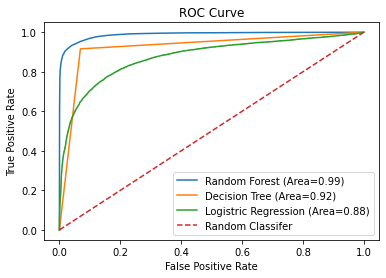

In [32]:
#ROC curve
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_RF, tpr_RF)

fpr, tpr, _ = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr_LR, tpr_LR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr_LR, tpr_LR)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forest (Area=0.99)','Decision Tree (Area=0.92)','Logistric Regression (Area=0.88)','Random Classifer'])